### Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Load pre-processed data from SQL database

In [2]:
engine = create_engine('mssql+pyodbc://MSI/predictive_maintenance_db?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
errors_df = pd.read_sql('SELECT * FROM PdM_errors', con=engine)
failures_df = pd.read_sql('SELECT * FROM PdM_failures', con=engine)
machines_df = pd.read_sql('SELECT * FROM PdM_machines', con=engine)
maint_df = pd.read_sql('SELECT * FROM PdM_maint', con=engine)
telemetry_df = pd.read_sql('SELECT * FROM PdM_telemetry', con=engine)

### Read datasets

In [3]:
print("Errors DataFrame:")
display(errors_df.head())

print("Failures DataFrame:")
display(failures_df.head())

print("Machines DataFrame:")
display(machines_df.head())

print("Maintenance DataFrame:")
display(maint_df.head())

print("Telemetry DataFrame:")
display(telemetry_df.head())


Errors DataFrame:


,datetime,machineID,errorID,date
0,2015-01-03 07:00:00,1,error1,2015-01-03
1,2015-01-03 20:00:00,1,error3,2015-01-03
2,2015-01-04 06:00:00,1,error5,2015-01-04
3,2015-01-10 15:00:00,1,error4,2015-01-10
4,2015-01-22 10:00:00,1,error4,2015-01-22


Failures DataFrame:


,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,comp4,2015-01-05
1,2015-03-06 06:00:00,1,comp1,2015-03-06
2,2015-04-20 06:00:00,1,comp2,2015-04-20
3,2015-06-19 06:00:00,1,comp4,2015-06-19
4,2015-09-02 06:00:00,1,comp4,2015-09-02


Machines DataFrame:


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Maintenance DataFrame:


,datetime,machineID,comp,date
0,2014-06-01 06:00:00,1,comp2,2014-06-01
1,2014-07-16 06:00:00,1,comp4,2014-07-16
2,2014-07-31 06:00:00,1,comp3,2014-07-31
3,2014-12-13 06:00:00,1,comp1,2014-12-13
4,2015-01-05 06:00:00,1,comp4,2015-01-05


Telemetry DataFrame:


,datetime,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


In [4]:
print(telemetry_df.head())
print(telemetry_df['datetime'].min(), telemetry_df['datetime'].max())


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01  
2015-01-01 06:00:00 2016-01-01 06:00:00


In [5]:
telemetry_df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,876100,2015-07-02 18:00:00,2015-01-01 06:00:00,2015-04-02 12:00:00,2015-07-02 18:00:00,2015-10-02 00:00:00,2016-01-01 06:00:00,NaN
machineID,876100.0,50.5,1.0,25.75,50.5,75.25,100.0,28.866087
volt,876100.0,170.777736,97.333604,160.304927,170.607338,181.004493,255.124717,15.509114
rotate,876100.0,446.605119,138.432075,412.305714,447.55815,482.1766,695.020984,52.673886
pressure,876100.0,100.858668,51.237106,93.498181,100.425559,107.555231,185.951998,11.048679
vibration,876100.0,40.385007,14.877054,36.777299,40.237247,43.784938,76.791072,5.370361


- Here we see sensor data for 4 operational settings that occurred over 12 months between January 1, 2015, and January 01, 2016. 


In [6]:
print(failures_df.head())
print(failures_df['datetime'].min(), failures_df['datetime'].max())


             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02
2015-01-02 03:00:00 2015-12-31 06:00:00


- Here we see that failures occurred over 12 months between January 2, 2015, and December 31, 2015. - 
- Failures involve different components (comp1, comp2, comp4), all related to machine ID 1 during this time range. 

### Here we drill down to focus on one machine from 100, namely machine no. 17

In [7]:
df_sel_17 = telemetry_df.loc[telemetry_df['machineID'] == 17].reset_index(drop=True)
print(df_sel_17.head(n=5))

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00         17  161.633747  462.698035   90.377391   
1 2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
2 2015-01-01 08:00:00         17  186.476591  498.922070   97.924391   
3 2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
4 2015-01-01 10:00:00         17  182.431544  502.774702  108.220639   

   vibration        date  
0  49.453414  2015-01-01  
1  57.482661  2015-01-01  
2  47.786767  2015-01-01  
3  66.352721  2015-01-01  
4  54.571089  2015-01-01  


In [8]:
df_sel_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8761 non-null   datetime64[ns]
 1   machineID  8761 non-null   int64         
 2   volt       8761 non-null   float64       
 3   rotate     8761 non-null   float64       
 4   pressure   8761 non-null   float64       
 5   vibration  8761 non-null   float64       
 6   date       8761 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


 - This machine number 17 has 8761 rows and 7 columns, including telemetry data (volt, rotate, pressure, vibration) and machineID.
- All columns are numeric except for the datetime column which is a timestamp, and date which is an object type (string).
- Memory used is approx 479.2 KB 
- There are no missing values.

In [9]:
print(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']].describe())

              volt       rotate     pressure    vibration
count  8761.000000  8761.000000  8761.000000  8761.000000
mean    170.726237   445.968525   101.342908    40.549045
std      15.694063    53.034564    11.325382     5.516199
min     107.286569   223.268150    66.079113    20.487291
25%     160.150078   411.696585    93.976460    36.896442
50%     170.503300   446.855943   100.851812    40.320077
75%     181.075973   482.323013   107.945500    43.925871
max     240.105419   637.852152   152.605505    70.587984


- Sensor Ranges: All sensor readings (voltage, rotation, pressure, vibration) show reasonable variability, with voltage and rotation having the highest range of values.

- Relatively Low Variation in Vibration: The vibration sensor has the lowest standard deviation, meaning its values are more tightly clustered around the mean compared to other sensors

In [10]:
df_sel_17.duplicated().sum()

0

In [11]:
round(df_sel_17.isnull().sum() / df_sel_17.isnull().count() * 100, 2)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
date         0.0
dtype: float64

- This is just an additional check, but we can confirm here that there are no missing values and that our pre-processing of the raw datasets cleared any duplicates.

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=df_sel_17, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        df_sel_17[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        df_sel_17[feature].median(), color="black", linestyle="-"
    )  

Skipping column: datetime
Skipping column: machineID
Skipping column: date


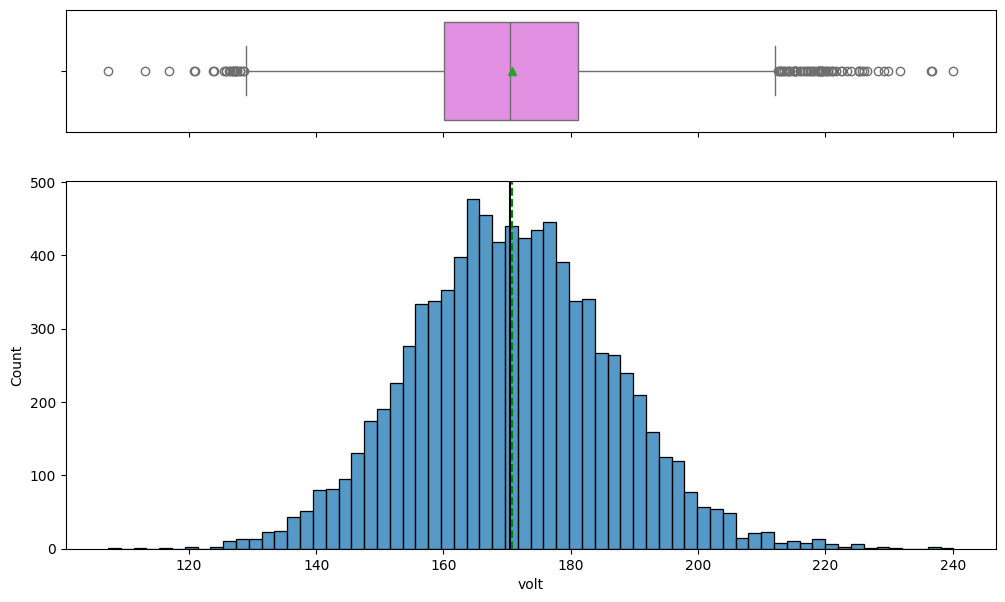

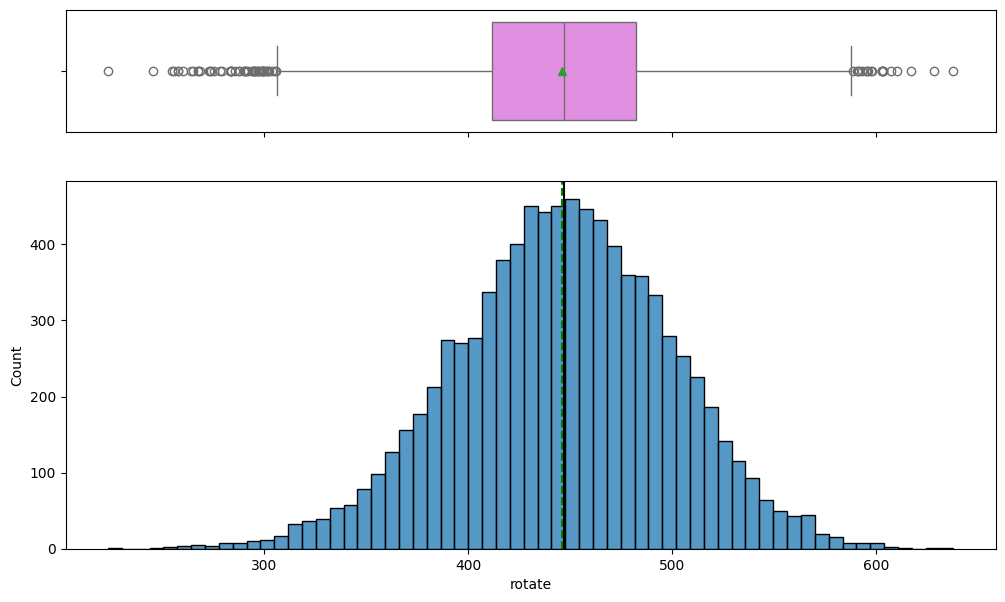

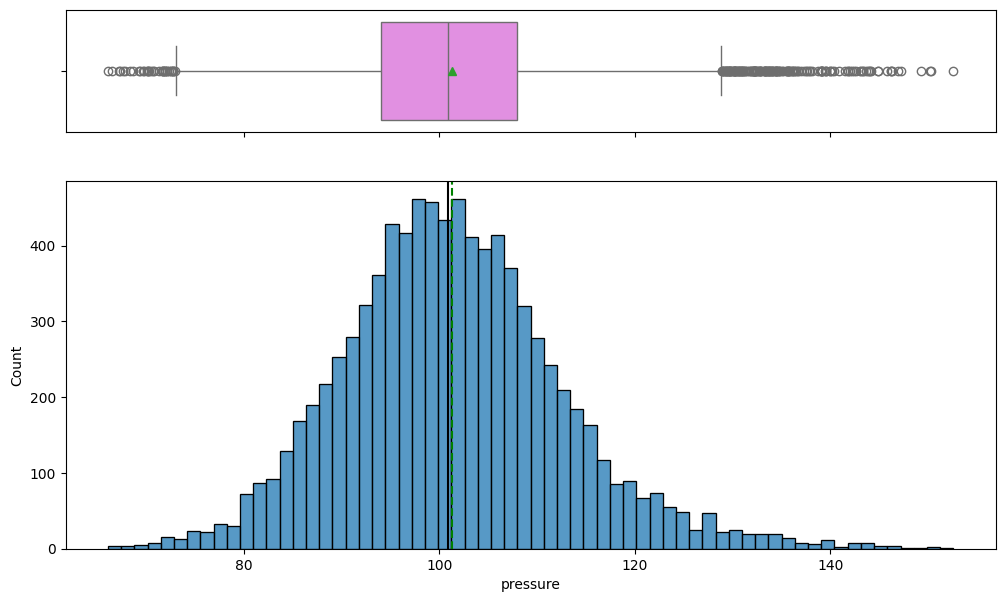

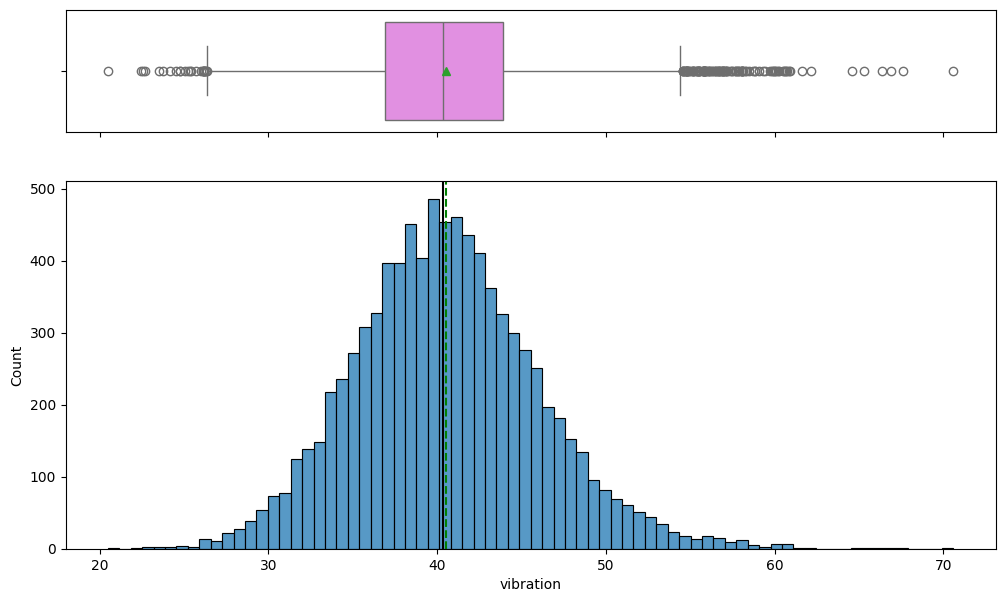

In [13]:
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

# Loop through columns, but only plot numeric features and skip 'machineID'
for feature in df_sel_17.columns:
    if is_numeric(df_sel_17[feature]) and feature != 'machineID':
        histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None)
    else:
        print(f"Skipping column: {feature}")

- Most of the sensors show a fairly normal distribution, with the mean and median values aligning closely.

- Standard Deviation appears to vary across the sensors, with a considerable portion of sensor readings showing spread beyond typical ranges. While some distributions have a higher concentration around the mean, sensors like pressure and voltage show a greater spread with extreme outliers.

- Outliers are present across all four sensors. The voltage and rotation sensors have several outliers on both the lower and upper ends. While these outliers exist, they don't seem to significantly distort the central values (mean and median). The pressure and vibration sensors also show a reasonable number of outliers on the higher end.

- The rotation sensor shows a slight right skew, as shown by a few high-value outliers stretching beyond the bulk of the data. Meanwhile, vibration shows a slight left skew, with more values on the lower side, though it is less pronounced.

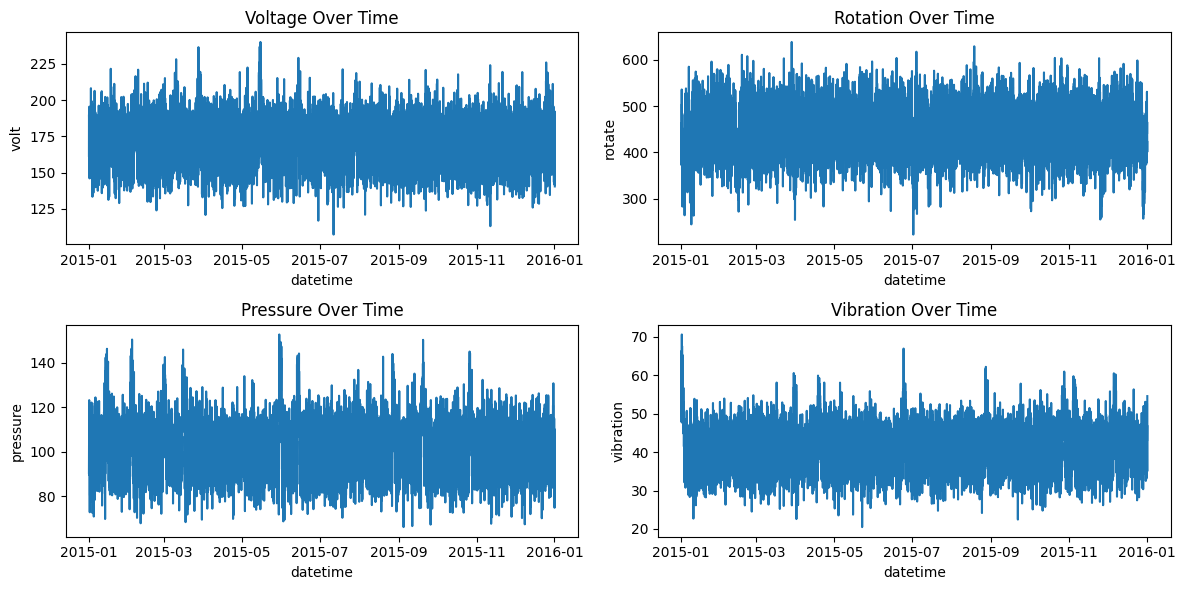

In [14]:
plt.figure(figsize=(12, 6))

# Plot voltage over time
plt.subplot(2, 2, 1)
sns.lineplot(x='datetime', y='volt', data=df_sel_17)
plt.title('Voltage Over Time')

# Plot rotation over time
plt.subplot(2, 2, 2)
sns.lineplot(x='datetime', y='rotate', data=df_sel_17)
plt.title('Rotation Over Time')

# Plot pressure over time
plt.subplot(2, 2, 3)
sns.lineplot(x='datetime', y='pressure', data=df_sel_17)
plt.title('Pressure Over Time')

# Plot vibration over time
plt.subplot(2, 2, 4)
sns.lineplot(x='datetime', y='vibration', data=df_sel_17)
plt.title('Vibration Over Time')

plt.tight_layout()
plt.show()

- There seems to be quite a few spikes that could be anomalies leading to errors or failures.
- We'll investigate further using z-scores to see how many standard deviations a sensor data point is from the mean, where we will target any point outside of -3 and +3 as anomaly.

In [15]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']])
z_scores_df = pd.DataFrame(z_scores, columns=['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore'])
df_anomalies = pd.concat([df_sel_17, z_scores_df], axis=1)
anomalies = df_anomalies[
    (df_anomalies['volt_zscore'].abs() > 3) |
    (df_anomalies['rotate_zscore'].abs() > 3) |
    (df_anomalies['pressure_zscore'].abs() > 3) |
    (df_anomalies['vibration_zscore'].abs() > 3)
]

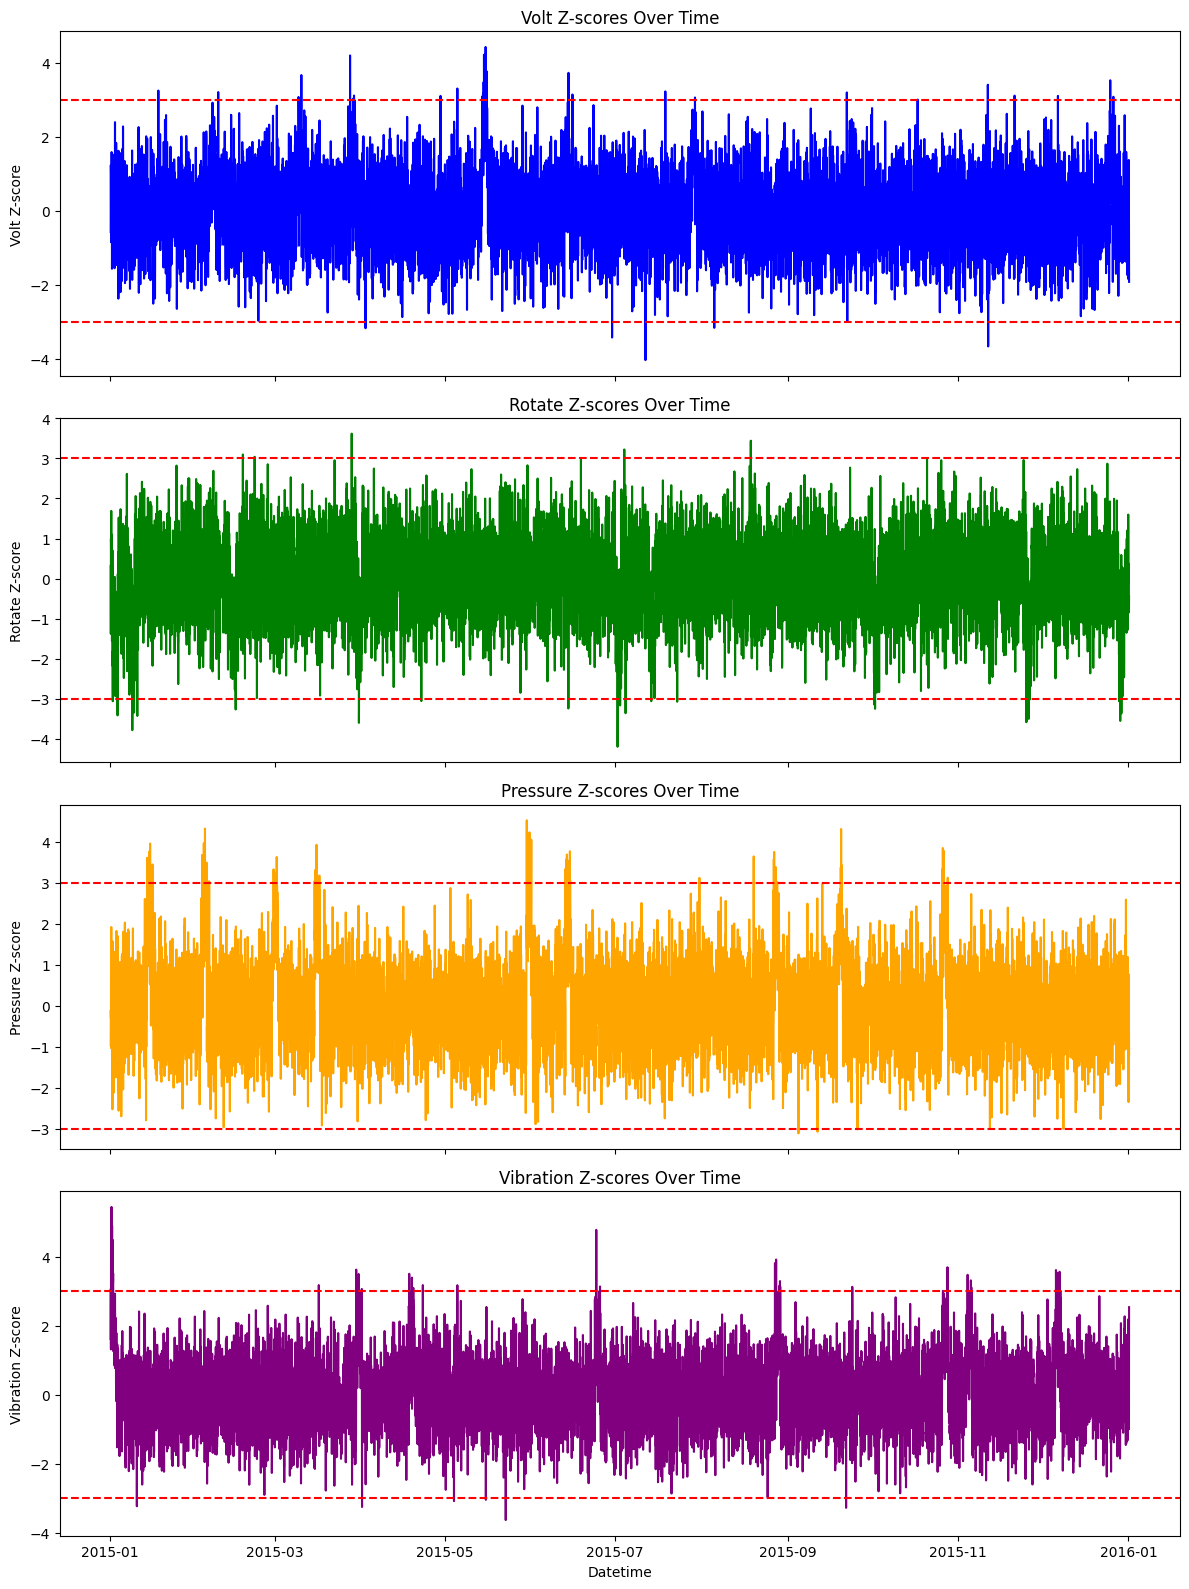

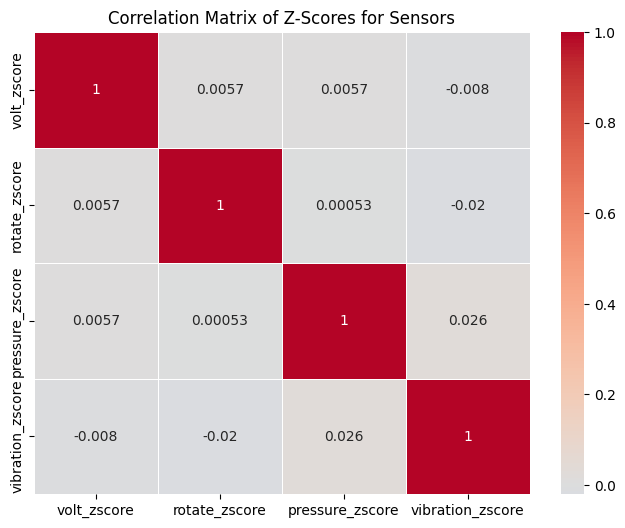

In [16]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])

# Plot Z-scores for each sensor over time to visually examine trends
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(df_anomalies['datetime'], df_anomalies['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time')

axs[1].plot(df_anomalies['datetime'], df_anomalies['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time')

axs[2].plot(df_anomalies['datetime'], df_anomalies['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time')

axs[3].plot(df_anomalies['datetime'], df_anomalies['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time')


axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()

# Checking correlation between sensor readings (volt, rotate, pressure, vibration)
correlation_matrix = df_anomalies[['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore']].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Z-Scores for Sensors')
plt.show()

- Both pressure and vibration seem to have more frequent spikes exceeding the threshold, indicating more frequent anomalies that need closer inspection.

- The most notable correlation is between the rotate_zscore and vibration_zscore (0.63), meaning these sensors tend to show anomalies at the same time. On the other hand, volt_zscore and pressure_zscore have a moderate negative correlation (-0.60), indicating an inverse relationship.

- These anomalies and correlations give us a good reason to zoom into the time period with most visual peaks during during the first quarter of 2015, to investigate potential patterns, causes, and behavior.

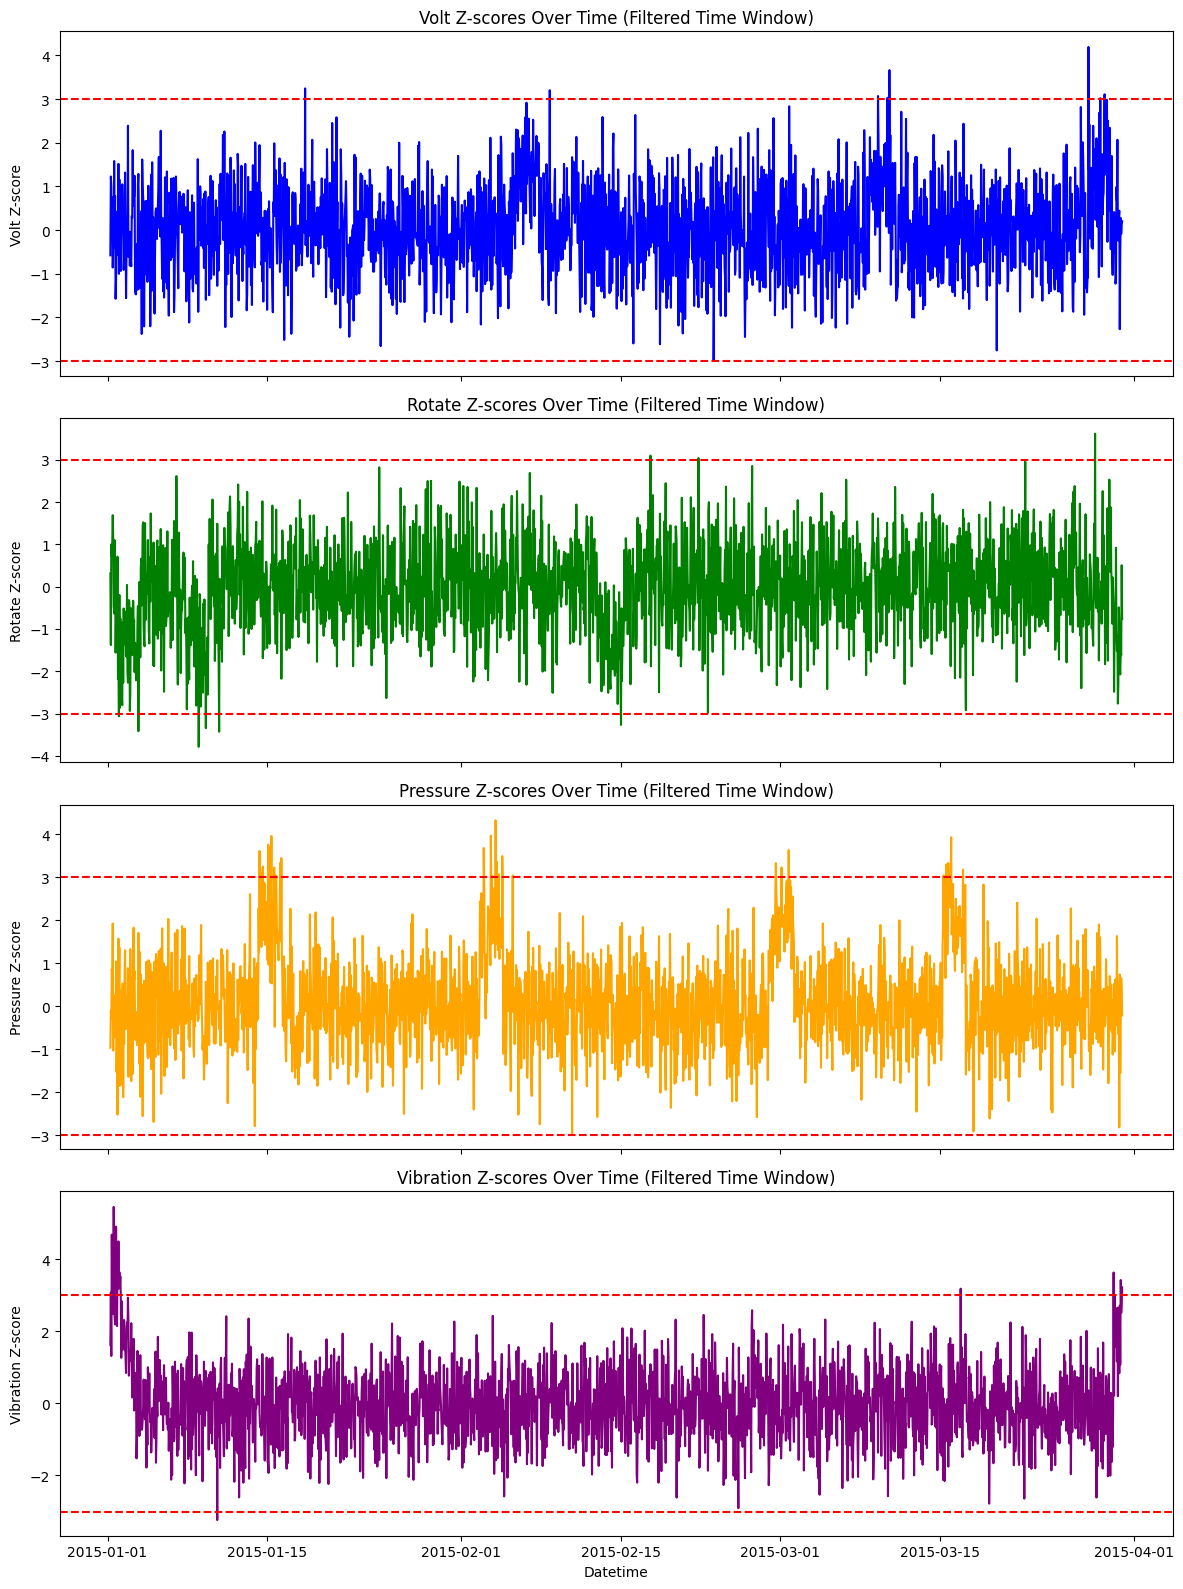

In [17]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])
start_date = '2015-01-01'
end_date = '2015-03-31'
df_time_window = df_anomalies[(df_anomalies['datetime'] >= start_date) & (df_anomalies['datetime'] <= end_date)]
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Plot volt Z-scores
axs[0].plot(df_time_window['datetime'], df_time_window['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time (Filtered Time Window)')

# Plot rotate Z-scores
axs[1].plot(df_time_window['datetime'], df_time_window['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time (Filtered Time Window)')

# Plot pressure Z-scores
axs[2].plot(df_time_window['datetime'], df_time_window['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time (Filtered Time Window)')

# Plot vibration Z-scores
axs[3].plot(df_time_window['datetime'], df_time_window['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time (Filtered Time Window)')

axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()


Overall, this first-quarter analysis highlights significant fluctuations, especially in voltage, pressure, and vibration, with several data points indicating potential anomalies or outliers. These might correlate with system irregularities or potential failures if left unchecked.

We can later move to use a Neural Network model to distinguish between normal and abnormal machine behavior by learning the normal operating range. We can use this to set thresholds so that we can act early on anomalies and use an app to schedule maintenance in a way that minimizes downtime and avoids costly breakdowns.

### Preprocessing

In [18]:
# Check data types for telemetry_df
print("Telemetry DataFrame Info:")
print(telemetry_df.info())

# Check data types for errors_df
print("\nErrors DataFrame Info:")
print(errors_df.info())

# Check data types for failures_df
print("\nFailures DataFrame Info:")
print(failures_df.info())

# Check data types for maintenance_df
print("\nMaintenance DataFrame Info:")
print(maint_df.info())

# Check data types for machines_df
print("\nMachines DataFrame Info:")
print(machines_df.info())


Telemetry DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
 6   date       876100 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 46.8+ MB
None

Errors DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-nu

In [19]:
# Convert 'model' to an integer
model_mapping = {value: i for i, value in enumerate(machines_df['model'].unique(), start=1)}
machines_df['model'] = machines_df['model'].map(model_mapping)
display(machines_df)

,machineID,model,age
0,1,1,18
1,2,2,7
2,3,1,8
3,4,1,7
4,5,1,2
...,...,...,...
95,96,3,10
96,97,3,14
97,98,3,20
98,99,4,14


In [20]:
print(failures_df.columns)


Index(['datetime', 'machineID', 'failure', 'date'], dtype='object')


In [21]:
failures_df = pd.get_dummies(failures_df, columns=['failure'], prefix='fail', dtype=int)
maint_df = pd.get_dummies(maint_df, columns=['comp'], prefix='maint', dtype=int)
errors_df = pd.get_dummies(errors_df, columns=['errorID'], prefix='', prefix_sep='', dtype=int)

In [22]:
print(failures_df.columns)
print(maint_df.columns)
print(errors_df.columns)

Index(['datetime', 'machineID', 'date', 'fail_comp1', 'fail_comp2',
       'fail_comp3', 'fail_comp4'],
      dtype='object')
Index(['datetime', 'machineID', 'date', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4'],
      dtype='object')
Index(['datetime', 'machineID', 'date', 'error1', 'error2', 'error3', 'error4',
       'error5'],
      dtype='object')


In [23]:
# Convert date columns to datetime format
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'])
failures_df['datetime'] = pd.to_datetime(failures_df['datetime'])
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
telemetry_df['datetime'] = pd.to_datetime(telemetry_df['datetime'])

print(errors_df['datetime'].dtypes)
print(failures_df['datetime'].dtypes)
print(maint_df['datetime'].dtypes)
print(telemetry_df['datetime'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [24]:
errors_df = errors_df.rename(columns={'datetime': 'datetime_error'})
failures_df = failures_df.rename(columns={'datetime': 'datetime_failure'})
maint_df = maint_df.rename(columns={'datetime': 'datetime_maint'})
telemetry_df = telemetry_df.rename(columns={'datetime': 'datetime_telemetry'})

In [25]:
print(failures_df.columns)
print(maint_df.columns)
print(errors_df.columns)

Index(['datetime_failure', 'machineID', 'date', 'fail_comp1', 'fail_comp2',
       'fail_comp3', 'fail_comp4'],
      dtype='object')
Index(['datetime_maint', 'machineID', 'date', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4'],
      dtype='object')
Index(['datetime_error', 'machineID', 'date', 'error1', 'error2', 'error3',
       'error4', 'error5'],
      dtype='object')


In [26]:
failures_df['failure_flag'] = 1
failure_count = failures_df['failure_flag'].sum()

errors_df['error_flag'] = 1
error_count = errors_df['error_flag'].sum()

maint_df['maint_flag'] = 1
maintenance_count = maint_df['maint_flag'].sum()

print(f"Number of failures: {failure_count}")
print(f"Number of errors: {error_count}")
print(f"Number of maintenances: {maintenance_count}")

Number of failures: 761
Number of errors: 3919
Number of maintenances: 3286


In [27]:
print(failures_df.columns)
print(maint_df.columns)
print(errors_df.columns)

Index(['datetime_failure', 'machineID', 'date', 'fail_comp1', 'fail_comp2',
       'fail_comp3', 'fail_comp4', 'failure_flag'],
      dtype='object')
Index(['datetime_maint', 'machineID', 'date', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4', 'maint_flag'],
      dtype='object')
Index(['datetime_error', 'machineID', 'date', 'error1', 'error2', 'error3',
       'error4', 'error5', 'error_flag'],
      dtype='object')


In [28]:
print(telemetry_df.shape)
print(errors_df.shape)
print(failures_df.shape)
print(maint_df.shape)
print(machines_df.shape)

(876100, 7)
(3919, 9)
(761, 8)
(3286, 8)
(100, 3)


In [29]:
display(telemetry_df.head())
display(errors_df.head())
display(failures_df.head())
display(maint_df.head())
display(machines_df.head())

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


,datetime_error,machineID,date,error1,error2,error3,error4,error5,error_flag
0,2015-01-03 07:00:00,1,2015-01-03,1,0,0,0,0,1
1,2015-01-03 20:00:00,1,2015-01-03,0,0,1,0,0,1
2,2015-01-04 06:00:00,1,2015-01-04,0,0,0,0,1,1
3,2015-01-10 15:00:00,1,2015-01-10,0,0,0,1,0,1
4,2015-01-22 10:00:00,1,2015-01-22,0,0,0,1,0,1


,datetime_failure,machineID,date,fail_comp1,fail_comp2,fail_comp3,fail_comp4,failure_flag
0,2015-01-05 06:00:00,1,2015-01-05,0,0,0,1,1
1,2015-03-06 06:00:00,1,2015-03-06,1,0,0,0,1
2,2015-04-20 06:00:00,1,2015-04-20,0,1,0,0,1
3,2015-06-19 06:00:00,1,2015-06-19,0,0,0,1,1
4,2015-09-02 06:00:00,1,2015-09-02,0,0,0,1,1


,datetime_maint,machineID,date,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag
0,2014-06-01 06:00:00,1,2014-06-01,0,1,0,0,1
1,2014-07-16 06:00:00,1,2014-07-16,0,0,0,1,1
2,2014-07-31 06:00:00,1,2014-07-31,0,0,1,0,1
3,2014-12-13 06:00:00,1,2014-12-13,1,0,0,0,1
4,2015-01-05 06:00:00,1,2015-01-05,0,0,0,1,1


,machineID,model,age
0,1,1,18
1,2,2,7
2,3,1,8
3,4,1,7
4,5,1,2


##### Merge Data

In [30]:
telemetry_df = telemetry_df.sort_values('datetime_telemetry')
failures_df = failures_df.sort_values('datetime_failure')
errors_df = errors_df.sort_values('datetime_error')
maintenance_df = maint_df.sort_values('datetime_maint')

merged_df = pd.merge(
    telemetry_df,
    machines_df,
    on='machineID',
    how='left'
)
merged_df = pd.merge_asof(
    merged_df,
    failures_df[['machineID', 'datetime_failure', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4', 'failure_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_failure',
    direction='backward',
    tolerance=pd.Timedelta('1d')  
)
merged_df = pd.merge_asof(
    merged_df,
    errors_df[['machineID', 'datetime_error', 'error1', 'error2', 'error3', 'error4', 'error5', 'error_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_error',
    direction='backward',
    tolerance=pd.Timedelta('1d')  
)
merged_df = pd.merge_asof(
    merged_df,
    maintenance_df[['machineID', 'datetime_maint', 'maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4', 'maint_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_maint',
    direction='backward',
    tolerance=pd.Timedelta('7d') 
)
merged_df.fillna(0, inplace=True)

indicator_columns = ['failure_flag', 'error_flag', 'maint_flag',
                     'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
                     'error1', 'error2', 'error3', 'error4', 'error5',
                     'maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4']

for col in indicator_columns:
    if col in merged_df.columns: 
        merged_df[col] = merged_df[col].astype(int)

display(merged_df)

C:\Users\rshaw\AppData\Local\Temp\ipykernel_7644\59725696.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merged_df.fillna(0, inplace=True)


,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,model,age,datetime_failure,...,error3,error4,error5,error_flag,datetime_maint,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,1,18,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,53,183.084582,420.980061,109.235805,45.737760,2015-01-01,1,5,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01,4,14,0,...,0,0,0,0,2014-12-28 06:00:00,0,1,0,0,1
3,2015-01-01 06:00:00,12,171.404215,576.923563,97.145400,47.725909,2015-01-01,1,9,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 06:00:00,6,136.878588,492.088420,149.003582,22.973289,2015-01-01,1,7,0,...,0,0,0,0,2014-12-28 06:00:00,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 06:00:00,70,188.135372,457.661580,89.725251,42.932201,2016-01-01,1,9,0,...,0,0,0,0,0,0,0,0,0,0
876096,2016-01-01 06:00:00,71,174.028202,349.326013,111.231561,38.669674,2016-01-01,3,18,0,...,0,0,0,0,0,0,0,0,0,0
876097,2016-01-01 06:00:00,72,183.176861,381.242172,104.658441,38.504998,2016-01-01,2,2,0,...,0,0,0,0,0,0,0,0,0,0
876098,2016-01-01 06:00:00,74,188.299688,494.616310,101.785150,41.609665,2016-01-01,2,4,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# merged_df.drop(['datetime_failure', 'datetime_error', 'datetime_maint'], axis=1, inplace=True)

In [32]:
print(merged_df.isnull().sum())


datetime_telemetry    0
machineID             0
volt                  0
rotate                0
pressure              0
vibration             0
date                  0
model                 0
age                   0
datetime_failure      0
fail_comp1            0
fail_comp2            0
fail_comp3            0
fail_comp4            0
failure_flag          0
datetime_error        0
error1                0
error2                0
error3                0
error4                0
error5                0
error_flag            0
datetime_maint        0
maint_comp1           0
maint_comp2           0
maint_comp3           0
maint_comp4           0
maint_flag            0
dtype: int64


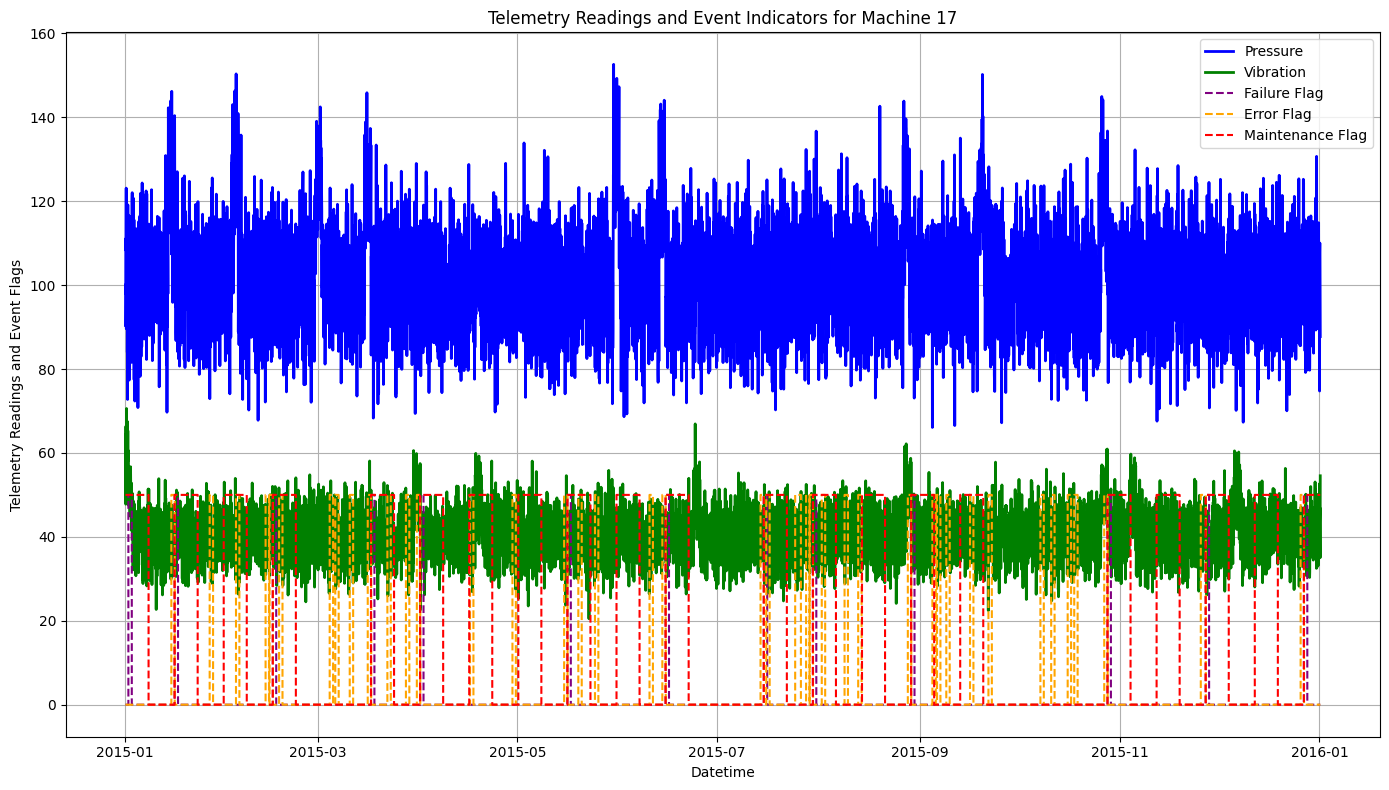

In [33]:
machine_id_to_plot = 17
plot_df = merged_df[merged_df['machineID'] == machine_id_to_plot]

plt.figure(figsize=(14, 8))
plt.plot(plot_df['datetime_telemetry'], plot_df['pressure'], label='Pressure', color='blue', linewidth=2)
plt.plot(plot_df['datetime_telemetry'], plot_df['vibration'], label='Vibration', color='green', linewidth=2)
if 'failure_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['failure_flag'] * 50, label='Failure Flag', color='purple', linestyle='--', where='post')
if 'error_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['error_flag'] * 50, label='Error Flag', color='orange', linestyle='--', where='post')
if 'maint_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['maint_flag'] * 50, label='Maintenance Flag', color='red', linestyle='--', where='post')
plt.xlabel('Datetime')
plt.ylabel('Telemetry Readings and Event Flags')
plt.title(f'Telemetry Readings and Event Indicators for Machine {machine_id_to_plot}')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Feature Engineering 

In [ ]:
# # Calculate if a failure will happen in the next 24 hours
# merged_df['failure_next_24h'] = merged_df.groupby('machineID')['fail_comp1'].shift(-24).fillna(0).astype(int)

# # Calculate if an error will happen in the next 24 hours
# merged_df['error_next_24h'] = merged_df.groupby('machineID')['error_flag'].shift(-24).fillna(0).astype(int)

# # View the new failure and error prediction features
# print(merged_df[['machineID', 'datetime_telemetry', 'failure_next_24h', 'error_next_24h']].head())

In [34]:
# "Time Since" Features using the telemetry datetime and flags

# Time since last maintenance (in hours)
merged_df['time_since_last_maint'] = (
    merged_df['datetime_telemetry'] - merged_df['datetime_telemetry'].where(merged_df['maint_flag'] == 1)
).dt.total_seconds() / 3600

# Time since last error (in hours)
merged_df['time_since_last_error'] = (
    merged_df['datetime_telemetry'] - merged_df['datetime_telemetry'].where(merged_df['error_flag'] == 1)
).dt.total_seconds() / 3600

# Time since last failure (in hours)
# Iterative loop needed between failures using time diff between i hour before most recent failure (.where(merged_df['failure_flag'] == 1)) and second last recent failure
merged_df['time_since_last_failure'] = (
    merged_df['datetime_telemetry'] - merged_df['datetime_telemetry'].where(merged_df['failure_flag'] == 1)
).dt.total_seconds() / 3600

merged_df.fillna({'time_since_last_maint': 99999, 'time_since_last_error': 99999, 'time_since_last_failure': 99999}, inplace=True) #As discussed in team, we fill NaN values for time_since features with a large value to indicate no recent events

display(merged_df.head())

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,model,age,datetime_failure,...,error_flag,datetime_maint,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag,time_since_last_maint,time_since_last_error,time_since_last_failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,1,18,0,...,0,0,0,0,0,0,0,99999.0,99999.0,99999.0
1,2015-01-01 06:00:00,53,183.084582,420.980061,109.235805,45.737760,2015-01-01,1,5,0,...,0,0,0,0,0,0,0,99999.0,99999.0,99999.0
2,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01,4,14,0,...,0,2014-12-28 06:00:00,0,1,0,0,1,0.0,99999.0,99999.0
3,2015-01-01 06:00:00,12,171.404215,576.923563,97.145400,47.725909,2015-01-01,1,9,0,...,0,0,0,0,0,0,0,99999.0,99999.0,99999.0
4,2015-01-01 06:00:00,6,136.878588,492.088420,149.003582,22.973289,2015-01-01,1,7,0,...,0,2014-12-28 06:00:00,1,0,0,0,1,0.0,99999.0,99999.0


In [35]:
print(merged_df['time_since_last_failure'].value_counts())
print(merged_df['time_since_last_error'].value_counts())
print(merged_df['time_since_last_maint'].value_counts())

time_since_last_failure
99999.0    858147
0.0         17953
Name: count, dtype: int64
time_since_last_error
99999.0    790231
0.0         85869
Name: count, dtype: int64
time_since_last_maint
99999.0    515101
0.0        360999
Name: count, dtype: int64


In [36]:
# Replace 99999.0 in time_since_last_* columns with the maximum observed value (excluding 99999.0)
time_features = ['time_since_last_failure', 'time_since_last_error', 'time_since_last_maint']

for feature in time_features:
    max_value = merged_df[merged_df[feature] != 99999.0][feature].max()
    merged_df[feature] = merged_df[feature].replace(99999.0, max_value)

In [37]:
# Calculate time since last maintenance for each component
for comp in ['maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4']:
    merged_df[f'time_since_last_{comp}'] = merged_df.groupby('machineID')['datetime_telemetry'].diff().dt.total_seconds() / 3600  # in hours
    merged_df[f'time_since_last_{comp}'] = merged_df[f'time_since_last_{comp}'].fillna(0)  # fill NaN for first entries
display(merged_df[['machineID', 'datetime_telemetry', 'time_since_last_maint_comp1', 'time_since_last_maint_comp2', 'time_since_last_maint_comp3', 'time_since_last_maint_comp4']].head())


,machineID,datetime_telemetry,time_since_last_maint_comp1,time_since_last_maint_comp2,time_since_last_maint_comp3,time_since_last_maint_comp4
0,1,2015-01-01 06:00:00,0.0,0.0,0.0,0.0
1,53,2015-01-01 06:00:00,0.0,0.0,0.0,0.0
2,99,2015-01-01 06:00:00,0.0,0.0,0.0,0.0
3,12,2015-01-01 06:00:00,0.0,0.0,0.0,0.0
4,6,2015-01-01 06:00:00,0.0,0.0,0.0,0.0


In [38]:
# Compute the rolling mean over a 24-hour window for each machineID 
sensor_columns = ['volt', 'rotate', 'pressure', 'vibration']
merged_df['datetime_telemetry'] = pd.to_datetime(merged_df['datetime_telemetry'])
merged_df = merged_df.sort_values(['machineID', 'datetime_telemetry'])
rolling_means = merged_df.groupby('machineID').rolling('24h', on='datetime_telemetry')[sensor_columns].mean()
rolling_means.reset_index(drop=True, inplace=True)
rolling_means.columns = [f"{col}_rolling_mean" for col in rolling_means.columns]
merged_df.reset_index(drop=True, inplace=True)
merged_df = pd.concat([merged_df, rolling_means], axis=1)
display(merged_df)


,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,model,age,datetime_failure,...,time_since_last_error,time_since_last_failure,time_since_last_maint_comp1,time_since_last_maint_comp2,time_since_last_maint_comp3,time_since_last_maint_comp4,pressure_rolling_mean,rotate_rolling_mean,vibration_rolling_mean,volt_rolling_mean
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,1,18,0,...,0.0,0.0,0.0,0.0,0.0,0.0,113.077935,418.504078,45.087686,176.217853
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01,1,18,0,...,0.0,0.0,1.0,1.0,1.0,1.0,104.269230,410.625784,44.250829,169.548538
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01,1,18,0,...,0.0,0.0,1.0,1.0,1.0,1.0,94.592122,449.533798,40.893502,170.028993
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01,1,18,0,...,0.0,0.0,1.0,1.0,1.0,1.0,98.256232,423.687682,40.950662,168.137453
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01,1,18,0,...,0.0,0.0,1.0,1.0,1.0,1.0,100.982315,426.025520,37.958632,166.031967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,2016-01-01,2,5,0,...,0.0,0.0,1.0,1.0,1.0,1.0,101.414987,462.234803,39.955780,170.619827
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,2016-01-01,2,5,0,...,0.0,0.0,1.0,1.0,1.0,1.0,101.396728,461.095362,39.964090,172.838745
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,2016-01-01,2,5,0,...,0.0,0.0,1.0,1.0,1.0,1.0,101.020326,455.688781,40.420416,173.778674
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,2016-01-01,2,5,0,...,0.0,0.0,1.0,1.0,1.0,1.0,101.447889,455.376558,40.261609,173.872030


### Feature Engineering for Regression

In [39]:
merged_df.columns

Index(['datetime_telemetry', 'machineID', 'volt', 'rotate', 'pressure',
       'vibration', 'date', 'model', 'age', 'datetime_failure', 'fail_comp1',
       'fail_comp2', 'fail_comp3', 'fail_comp4', 'failure_flag',
       'datetime_error', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_flag', 'datetime_maint', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4', 'maint_flag', 'time_since_last_maint',
       'time_since_last_error', 'time_since_last_failure',
       'time_since_last_maint_comp1', 'time_since_last_maint_comp2',
       'time_since_last_maint_comp3', 'time_since_last_maint_comp4',
       'pressure_rolling_mean', 'rotate_rolling_mean',
       'vibration_rolling_mean', 'volt_rolling_mean'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    171644
           1       0.65      0.01      0.02      3576

    accuracy                           0.98    175220
   macro avg       0.81      0.51      0.51    175220
weighted avg       0.97      0.98      0.97    175220

Confusion Matrix:
[[171624     20]
 [  3539     37]]


C:\Users\rshaw\AppData\Local\Temp\ipykernel_7644\3271440282.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


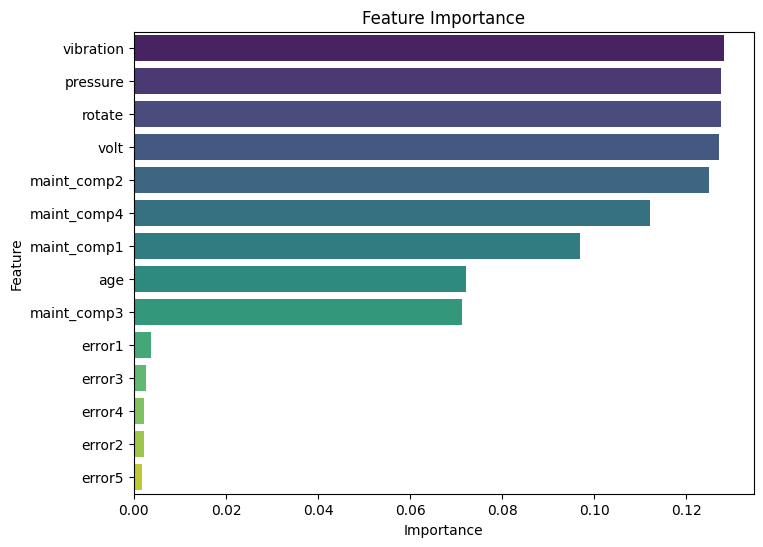

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

additional_columns = ['age']  # 'model' needs encoding
sensor_columns = ['volt', 'rotate', 'pressure', 'vibration']
error_columns = ['error1', 'error2', 'error3', 'error4', 'error5']
maint_columns = ['maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4']
merged_df_encoded = pd.get_dummies(merged_df, columns=['model'], drop_first=True)
target_column = 'failure_flag'

X = merged_df_encoded[sensor_columns + error_columns + maint_columns + additional_columns]
y = merged_df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


- The maintenance components take the top positions in feature importance. This suggests that recent maintenance activities on these components are highly predictive of failures. 

- While sensor readings (rotate, pressure, vibration, voltage) still hold importance, their influence is noticeably lower than the maintenance features. Among the sensors, rotate has the highest importance. This suggests that monitoring and analyzing maintenance data might provide better insights into potential machine failures than solely relying on sensor data.

Number of anomalies detected: 43805
Examples of anomalies detected:
    datetime_telemetry  machineID        volt      rotate    pressure  \
50 2015-01-03 08:00:00          1  164.341435  568.972310   94.488533   
52 2015-01-03 10:00:00          1  194.581170  448.360259   98.390618   
53 2015-01-03 11:00:00          1  156.866113  405.869840   98.640816   
54 2015-01-03 12:00:00          1  171.826400  439.841489   87.874871   
55 2015-01-03 13:00:00          1  190.431960  427.675888  116.008404   

    vibration        date  model  age datetime_failure  ...  \
50  49.023585  2015-01-03      1   18                0  ...   
52  50.602141  2015-01-03      1   18                0  ...   
53  54.698163  2015-01-03      1   18                0  ...   
54  55.768097  2015-01-03      1   18                0  ...   
55  55.062110  2015-01-03      1   18                0  ...   

    time_since_last_failure  time_since_last_maint_comp1  \
50                      0.0                          1

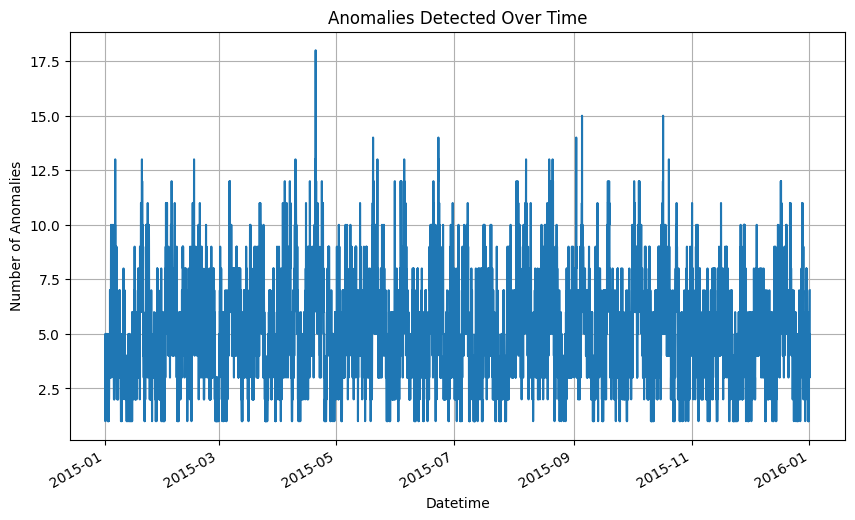

In [43]:
from sklearn.ensemble import IsolationForest
X = merged_df[sensor_columns + additional_columns + error_columns + maint_columns]

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
merged_df['anomaly_flag'] = iso_forest.fit_predict(X)

anomaly_count = np.sum(merged_df['anomaly_flag'] == -1)
print(f"Number of anomalies detected: {anomaly_count}")

anomalies = merged_df[merged_df['anomaly_flag'] == -1]
print("Examples of anomalies detected:")
print(anomalies.head())

anomaly_count_by_machine = merged_df[merged_df['anomaly_flag'] == -1]['machineID'].value_counts()
print("Anomaly count by machine:")
print(anomaly_count_by_machine)

merged_df['datetime_telemetry'] = pd.to_datetime(merged_df['datetime_telemetry']) 
anomalies_over_time = merged_df[merged_df['anomaly_flag'] == -1].groupby('datetime_telemetry').size()

plt.figure(figsize=(10, 6))
anomalies_over_time.plot(kind='line')
plt.title('Anomalies Detected Over Time')
plt.xlabel('Datetime')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.show()

Seasonality or Cyclic Trends:

- The presence of higher anomaly counts in April, June and December suggests potential cyclic or seasonal trends, so we can understand when anomalies are likely to cluster. We will use this in deciding the right windowed sequences to build our neural network model for failure predictions.

24-Hour Window:
The anomalies happened within 24 hours before the failure, which suggests that sensor behavior leading up to a failure changes significantly during this time.
This points to a 24-hour window being a critical time frame for capturing predictive patterns related to failures.

Shorter sequences, like 10 hours, might miss earlier warning signals, while longer sequences (like 50 or 100 hours) could introduce noise from periods where the machine operates normally without failure symptoms.

Failures and Anomalies:
The rows correspond to sensor readings (voltage, rotation, pressure, vibration) taken within 24 hours of a failure event.
These rows also include an anomaly_flag of -1, indicating that anomalies were detected before the failure.
The presence of both failure_flag and anomaly_flag shows that these anomalies are closely linked to the failure events, reinforcing the idea that machine anomalies occur within a short timeframe before breakdowns.

In [46]:
# Cross-reference anomalies with failure events
anomalies_and_failures = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['failure_flag'] == 1)]
print(f"Number of anomalies that coincide with failures: {len(anomalies_and_failures)}")
print(anomalies_and_failures.head())

# Cross-reference anomalies with maintenance events
anomalies_and_maintenance = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['maint_flag'] == 1)]
print(f"Number of anomalies that coincide with maintenance: {len(anomalies_and_maintenance)}")
print(anomalies_and_maintenance.head())


Number of anomalies that coincide with failures: 2491
      datetime_telemetry  machineID        volt      rotate    pressure  \
96   2015-01-05 06:00:00          1  179.303153  499.777962  111.833028   
1536 2015-03-06 06:00:00          1  198.257975  456.862342   89.333995   
2616 2015-04-20 06:00:00          1  180.050801  346.362480  105.661164   
4056 2015-06-19 06:00:00          1  187.673963  493.005160  105.334392   
5856 2015-09-02 06:00:00          1  144.094532  409.380150  106.720871   

      vibration        date  model  age     datetime_failure  ...  \
96    52.383097  2015-01-05      1   18  2015-01-05 06:00:00  ...   
1536  38.671900  2015-03-06      1   18  2015-03-06 06:00:00  ...   
2616  39.218055  2015-04-20      1   18  2015-04-20 06:00:00  ...   
4056  53.963961  2015-06-19      1   18  2015-06-19 06:00:00  ...   
5856  57.454990  2015-09-02      1   18  2015-09-02 06:00:00  ...   

      time_since_last_maint_comp1  time_since_last_maint_comp2  \
96            

- Anomalies also coincide with maintenance events (315 cases), suggesting that some anomalies might trigger maintenance, or that anomalies might be related to repair work done on the machines.
If a machine is undergoing maintenance, we should be careful not to overinterpret those anomalies as signs of failure. Instead, they might be expected behavior during maintenance operations.
- We want to filter out anomalies that coincide with maintenance events, since they may not be indicative of failure but rather part of expected maintenance operations.
When constructing our sequences, we can ensure that the maintenance_flag is factored in, so the model knows when maintenance is happening and can distinguish between anomalies due to failure risk and anomalies due to ongoing maintenance.

- The high frequency of anomalies spread across multiple hours indicates that a longer window (24 to 48 hours) is necessary to capture the build-up of anomalies and their impact on failures.

In [48]:
# Convert all columns to numeric, forcing errors (non-numeric data) to NaN
numeric_df = merged_df.apply(pd.to_numeric, errors='coerce')
numeric_df

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,model,age,datetime_failure,...,time_since_last_maint_comp1,time_since_last_maint_comp2,time_since_last_maint_comp3,time_since_last_maint_comp4,pressure_rolling_mean,rotate_rolling_mean,vibration_rolling_mean,volt_rolling_mean,anomaly_flag,next_failure_time
0,1420092000000000000,1,176.217853,418.504078,113.077935,45.087686,NaN,1,18,0.0,...,0.0,0.0,0.0,0.0,113.077935,418.504078,45.087686,176.217853,1,1420095600000000000
1,1420095600000000000,1,162.879223,402.747490,95.460525,43.413973,NaN,1,18,0.0,...,1.0,1.0,1.0,1.0,104.269230,410.625784,44.250829,169.548538,1,1420099200000000000
2,1420099200000000000,1,170.989902,527.349825,75.237905,34.178847,NaN,1,18,0.0,...,1.0,1.0,1.0,1.0,94.592122,449.533798,40.893502,170.028993,1,1420102800000000000
3,1420102800000000000,1,162.462833,346.149335,109.248561,41.122144,NaN,1,18,0.0,...,1.0,1.0,1.0,1.0,98.256232,423.687682,40.950662,168.137453,1,1420106400000000000
4,1420106400000000000,1,157.610021,435.376873,111.886648,25.990511,NaN,1,18,0.0,...,1.0,1.0,1.0,1.0,100.982315,426.025520,37.958632,166.031967,1,1420110000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,1451613600000000000,100,179.438162,395.222827,102.290715,50.771941,NaN,2,5,0.0,...,1.0,1.0,1.0,1.0,101.414987,462.234803,39.955780,170.619827,1,1451617200000000000
876096,1451617200000000000,100,189.617555,446.207972,98.180607,35.123072,NaN,2,5,0.0,...,1.0,1.0,1.0,1.0,101.396728,461.095362,39.964090,172.838745,1,1451620800000000000
876097,1451620800000000000,100,192.483414,447.816524,94.132837,48.314561,NaN,2,5,0.0,...,1.0,1.0,1.0,1.0,101.020326,455.688781,40.420416,173.778674,1,1451624400000000000
876098,1451624400000000000,100,165.475310,413.771670,104.081073,44.835259,NaN,2,5,0.0,...,1.0,1.0,1.0,1.0,101.447889,455.376558,40.261609,173.872030,1,1451628000000000000


In [ ]:
import pickle
import os

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model # type: ignore
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Conv1D, Dense, Flatten # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tcn import TCN

In [53]:
import sklearn
print(sklearn.__version__)


1.5.2


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # Can try MinMaxScaler() or RobustScaler() too
telemetry_cols = ['pressure', 'volt', 'vibration', 'rotate']
merged_df[telemetry_cols] = scaler.fit_transform(merged_df[telemetry_cols])

In [ ]:
# merged_df = pd.get_dummies(merged_df, columns=['model'])

In [ ]:
# Split the data into training, validation, and test sets
train_data = merged_df[(merged_df['datetime_telemetry'] >= '2014-06-01') & (merged_df['datetime_telemetry'] <= '2015-08-31')]
val_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-09-01') & (merged_df['datetime_telemetry'] <= '2015-10-31')]
test_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-11-01') & (merged_df['datetime_telemetry'] <= '2015-12-31')]

# Reset indices
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
# Define feature columns (exclude any non-numeric or irrelevant columns)
feature_columns = ['volt', 'rotate', 'pressure', 'vibration', 'age',
                   'pressure_rolling_mean', 'rotate_rolling_mean',
                   'vibration_rolling_mean', 'volt_rolling_mean']

# Define target columns for classification and regression
classification_target = 'failure_flag'  # Assuming 'failure_flag' indicates failure or not
regression_target = 'time_since_last_failure'  # Predict time since last failure

# Fill NaN values in targets if necessary
train_data[regression_target].fillna(0, inplace=True)
val_data[regression_target].fillna(0, inplace=True)
test_data[regression_target].fillna(0, inplace=True)

# Initialize RobustScaler
scaler = RobustScaler()

# Fit scaler on training data
scaler.fit(train_data[feature_columns])

# Transform features
train_features = scaler.transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

# Extract targets
train_classification_target = train_data[classification_target].values
val_classification_target = val_data[classification_target].values
test_classification_target = test_data[classification_target].values

train_regression_target = train_data[regression_target].values
val_regression_target = val_data[regression_target].values
test_regression_target = test_data[regression_target].values

In [ ]:
# train_data.loc[:, telemetry_cols] = scaler.fit_transform(train_data[telemetry_cols])
# val_data.loc[:, telemetry_cols] = scaler.transform(val_data[telemetry_cols])
# test_data.loc[:, telemetry_cols] = scaler.transform(test_data[telemetry_cols])

In [ ]:
# Function to create sequences
def create_sequences(features, classification_targets, regression_targets, sequence_length=24):
    X, y_class, y_reg = [], [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y_class.append(classification_targets[i+sequence_length])
        y_reg.append(regression_targets[i+sequence_length])
    return np.array(X), np.array(y_class), np.array(y_reg)

# Create sequences for training, validation, and test sets
sequence_length = 24

X_train, y_train_class, y_train_reg = create_sequences(train_features, train_classification_target, train_regression_target, sequence_length)
X_val, y_val_class, y_val_reg = create_sequences(val_features, val_classification_target, val_regression_target, sequence_length)
X_test, y_test_class, y_test_reg = create_sequences(test_features, test_classification_target, test_regression_target, sequence_length)

In [ ]:
# # Ensure the data is a NumPy array
# X_train = np.array(X_train)
# X_val = np.array(X_val)
# X_test = np.array(X_test)

In [ ]:
# Define the model architecture
input_shape = (sequence_length, len(feature_columns))
inputs = Input(shape=input_shape)

# TCN layers
x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(x)
x = Flatten()(x)

# Output layers for multitask learning
output_class = Dense(1, activation='sigmoid', name='classification_output')(x)
output_reg = Dense(1, activation='linear', name='regression_output')(x)

# Define the model
model = Model(inputs=inputs, outputs=[output_class, output_reg])

# Compile the model
model.compile(optimizer='adam',
              loss={'classification_output': 'binary_crossentropy', 'regression_output': 'mean_absolute_error'},
              metrics={'classification_output': 'accuracy', 'regression_output': 'mean_absolute_error'})

# Summary of the model
model.summary()

In [ ]:
# Check the input shape of X_train
# input_shape = (X_train.shape[1], X_train.shape[2])  # timesteps and features

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train,
    {'classification_output': y_train_class, 'regression_output': y_train_reg},
    epochs=10,
    batch_size=64,
    validation_data=(X_val, {'classification_output': y_val_class, 'regression_output': y_val_reg}),
    callbacks=[early_stopping]
)

In [ ]:
# Save the model to the specified path
model_path = r'C:\Users\rshaw\Desktop\EC Utbildning - Data Science\Kurs 9 - Project\Project\ds23_projektkurs\predictive-maintenance\models\Trained models'

# Ensure the directory exists
os.makedirs(model_path, exist_ok=True)

# Save the model architecture and weights
model.save(os.path.join(model_path, 'tcn_multitask_model.h5'))

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Extract predictions for classification and regression
pred_class = predictions[0].flatten()
pred_reg = predictions[1].flatten()

# Threshold classification predictions
pred_class_labels = (pred_class >= 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test_class, pred_class_labels))

# Regression evaluation
mae = mean_absolute_error(y_test_reg, pred_reg)
print(f"Regression Mean Absolute Error: {mae}")


In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Classification accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_output_accuracy'])
plt.plot(history.history['val_classification_output_accuracy'])
plt.title('Model Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Regression loss (Mean Squared Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['regression_output_loss'])
plt.plot(history.history['val_regression_output_loss'])
plt.title('Model Regression Loss')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
